In [1]:
print("Hello world")

Hello world


In [2]:
#ucitavanje biblioteka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter
import seaborn as sns
#sklearn preprocesiranje
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import SelectKBest, f_classif
#sklearn modeli
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
#sklearn metrike 
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, precision_recall_fscore_support, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, auc
#from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
#za handlovanje nebalansiranih datasetova
from imblearn.over_sampling import SMOTE
#sklearn model selection
from sklearn.model_selection import GridSearchCV
#sklearn feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
#sklearn cross-validation
from sklearn.model_selection import cross_val_score, cross_validate
#feature reduction sa PCA
from sklearn.decomposition import PCA
#rad sa pipeline-om
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
#genetski algoritmi
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Categorical, Integer, Continuous
from sklearn_genetic.plots import plot_fitness_evolution
from sklearn_genetic import GAFeatureSelectionCV

In [69]:
#ucitavanje data seta

file_name = "Dry_Bean_Dataset.csv"
bean_data = pd.read_csv(file_name)

bean_data.head(10)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


In [4]:
#svi tipovi podataka su numericki
bean_data.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [5]:
#ulazne i izlazna kolona
input_cols = bean_data[bean_data.columns.difference(['Class'])]
output_col = bean_data['Class']

In [6]:
#provera da li ima null vrednosti
bean_data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [7]:
#provera da li ima duplikata
duplicates = bean_data.duplicated().sum()
print('Number of duplicates found: ' + str(duplicates))
bean_data = bean_data.drop_duplicates()

Number of duplicates found: 68


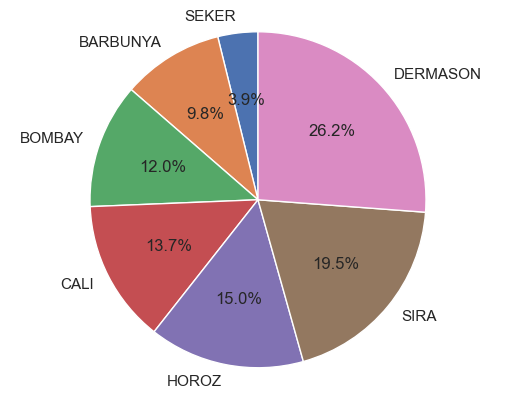

In [8]:
#pie chart
sns.set()
def pie_chart(data):
    labels = pd.unique(data['Class'])
    countByClass = data.groupby('Class').size().sort_values()
    dataSize = data.shape[0]
    sizes= [0]*len(labels)
    for i in range(len(labels)):
        sizes[i] = countByClass[i]/dataSize*100
    fig, ax = plt.subplots()
    ax.pie(sizes,labels = labels, autopct= '%1.1f%%',shadow=False, startangle=90)
    ax.axis('equal')
    plt.show()
pie_chart(bean_data)

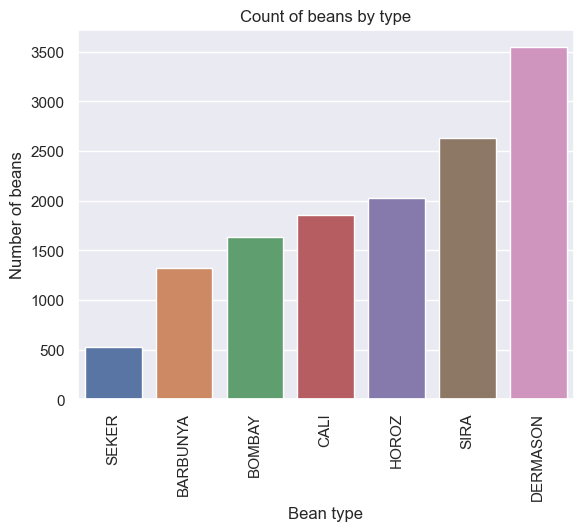

In [9]:
#bar chart
labels = pd.unique(bean_data['Class'])
countByClass = bean_data.groupby('Class').size().sort_values()
sns.barplot(x = labels, y = countByClass,data=bean_data)
plt.title('Count of beans by type')
plt.xlabel('Bean type')
plt.xticks(rotation=90)
plt.ylabel('Number of beans')
plt.show()

Bean data before oversampling: (13611, 17)
Bean data after oversampling:  (24822, 17)


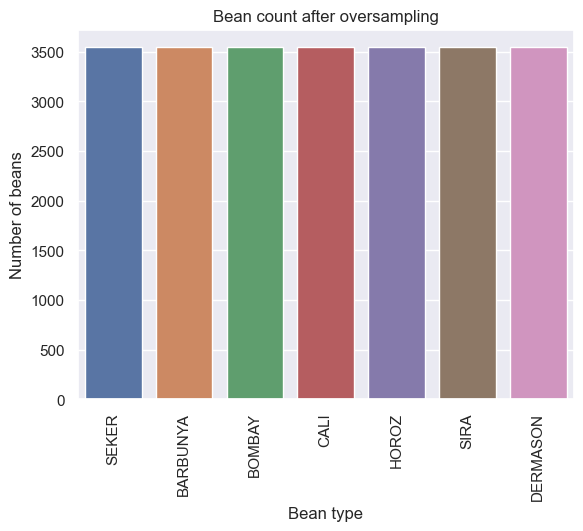

In [35]:
def oversampling(data):
    oversample = SMOTE()
    X_oversample, y_oversample = oversample.fit_resample(data[data.columns.difference(['Class'])], data['Class'])
    data_frame = pd.DataFrame(X_oversample)
    data_frame['Class'] = y_oversample
    print('Bean data before oversampling:', data.shape)
    print('Bean data after oversampling: ', X_oversample.shape)
    count_oversample = X_oversample.groupby('Class').size().sort_values()
    sns.barplot(x = labels, y = count_oversample, data = X_oversample)
    plt.title('Bean count after oversampling')
    plt.xlabel('Bean type')
    plt.xticks(rotation=90)
    plt.ylabel('Number of beans')
    plt.show()
    return data_frame
bean_data_balanced = oversampling(bean_data)

In [12]:
#deskriptivna statistika 
print(bean_data.describe())

                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13543.000000  13543.000000     13543.000000     13543.000000   
mean    53048.460385    854.993406       319.895602       202.365321   
std     29392.438324    214.722684        85.809260        45.051632   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36282.500000    703.230000       253.086806       175.886357   
50%     44580.000000    793.896000       296.404589       192.491117   
75%     61382.000000    977.146500       376.312489       217.245403   
max    254616.000000   1985.370000       738.860154       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13543.000000  13543.000000   13543.000000   13543.000000  13543.000000   
mean       1.581075      0.750315   53767.986709     253.034094      0.749829   
std        0.245245      0.091858   29844.248525      59.307709      0.048939   
min        1.024868      0.

In [13]:
# min max skaliranje, vrednosti su od nula do jedan
num_cols = bean_data.select_dtypes(include=['int64','float64']).columns
minmax_scaler = MinMaxScaler()
#pravimo kopiju da originalni set ne bi bio promenjen
bean_data_norm = bean_data.copy()
bean_data_norm[num_cols]= minmax_scaler.fit_transform(bean_data_norm[num_cols])
bean_data_norm.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0.034053,0.058574,0.044262,0.152142,0.122612,0.477797,0.033107,0.070804,0.671024,0.922824,0.934823,0.786733,0.593432,0.833049,0.750996,0.980620,SEKER
1,0.035500,0.077557,0.030479,0.178337,0.051577,0.278472,0.034991,0.073577,0.735504,0.871514,0.793138,0.903549,0.547447,0.967316,0.884987,0.974979,SEKER
2,0.038259,0.068035,0.052633,0.158190,0.131521,0.496448,0.037126,0.078816,0.716671,0.932141,0.914511,0.773514,0.582016,0.800942,0.736200,0.987196,SEKER
3,0.040940,0.082942,0.048548,0.177691,0.091623,0.403864,0.041389,0.083854,0.731365,0.761614,0.826871,0.829912,0.552408,0.854744,0.799846,0.893675,SEKER
4,0.041504,0.065313,0.032862,0.200679,0.025565,0.165680,0.040123,0.084906,0.700538,0.949832,0.988408,0.951583,0.510741,1.000000,0.941770,0.989116,SEKER


In [14]:
# standardno skaliranje
num_cols = bean_data.select_dtypes(include=['int64','float64']).columns
standard_scaler = StandardScaler()
#pravimo kopiju da originalni set ne bi bio promenjen
bean_data_std = bean_data.copy()
bean_data_std[num_cols]= standard_scaler.fit_transform(bean_data_std[num_cols])
bean_data_std.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.838800,-1.139663,-1.301976,-0.632111,-1.565363,-2.182833,-0.839489,-1.060491,0.287981,0.366476,1.420346,1.838628,0.681918,2.398280,1.924811,0.838679,SEKER
1,-0.827266,-1.010529,-1.391169,-0.435758,-1.972460,-3.685504,-0.824175,-1.041410,0.697598,-0.465886,0.224987,2.497622,0.369551,3.097472,2.691446,0.771141,SEKER
2,-0.805287,-1.075303,-1.247807,-0.586775,-1.514305,-2.042229,-0.806818,-1.005357,0.577958,0.517614,1.248979,1.764053,0.604373,2.231086,1.840150,0.917418,SEKER
3,-0.783920,-0.973894,-1.274241,-0.440595,-1.742960,-2.740196,-0.772170,-0.970686,0.671302,-2.248692,0.509588,2.082211,0.403254,2.511258,2.204306,-0.202372,SEKER
4,-0.779429,-1.093821,-1.375750,-0.268281,-2.121534,-4.535823,-0.782457,-0.963445,0.475476,0.804605,1.872434,2.768598,0.120215,3.267675,3.016333,0.940406,SEKER


            Feature  Number of Outliers
4      Eccentricity                 833
14         Solidity                 774
13     ShapeFactor4                 760
8   MinorAxisLength                 567
0              Area                 551
3        ConvexArea                 549
10     ShapeFactor1                 533
5     EquivDiameter                 526
9         Perimeter                 500
1      AspectRation                 485
7   MajorAxisLength                 379
6            Extent                 271
12     ShapeFactor3                 202
2       Compactness                 124
15        roundness                  98
11     ShapeFactor2                   0


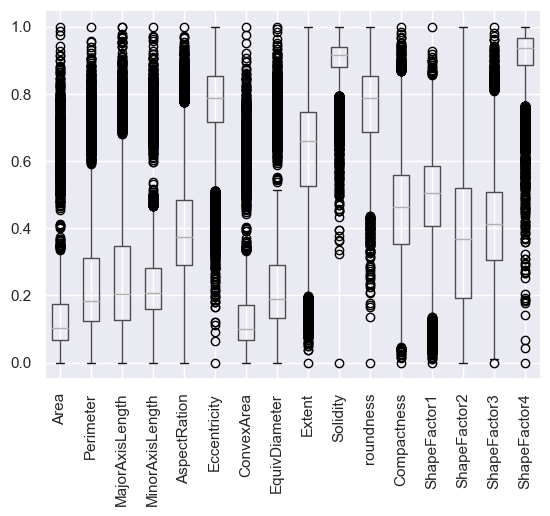

In [15]:
#detekcija outliera pomocu iqr
def find_outliers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3=  df[col_name].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df[((df[col_name]<(q1-1.5*iqr)) | (df[col_name]>(q3+1.5*iqr)))]
    return outliers
cols_to_use = bean_data_norm[bean_data.columns.difference(['Class'])]
total_outlier_num=0
cols = cols_to_use.columns.values
num_cols=[]
for col in cols:
    num = find_outliers(cols_to_use, col)
    num_cols.append(len(num))
new_data_frame = pd.DataFrame()
new_data_frame['Feature']= cols
new_data_frame['Number of Outliers']= num_cols
print(new_data_frame.sort_values(by='Number of Outliers', ascending = False))
boxplot = bean_data_norm.boxplot(rot=90)

In [37]:
def delete_outliers(data):
    isolation_forest = IsolationForest(n_estimators = 100, contamination = 0.05, max_samples = 'auto')
    outlier_prediction = isolation_forest.fit_predict(data[data.columns.difference(['Class'])].values)
    print("Number of normal values detected: {}".format(outlier_prediction[outlier_prediction  == 1].sum()))
    print("Number of outliers detected: {}".format(abs(outlier_prediction[outlier_prediction == -1].sum())))
    data_no_outliers = data.copy()
    data_no_outliers['Is_Outlier'] = outlier_prediction
    data_no_outliers.drop(data_no_outliers[(data_no_outliers['Is_Outlier'] == -1)].index, axis = 0, inplace=True)
    data_no_outliers = data_no_outliers[data_no_outliers.columns.difference(['Is_Outlier'])]
    print('Number of values after eliminating outliers: ' + str(len(data_no_outliers)))
    return data_no_outliers
bean_data_b_no_outliers = delete_outliers(bean_data_balanced)

Number of normal values detected: 23580
Number of outliers detected: 1242
Number of values after eliminating outliers: 23580


In [16]:
#train_test_split funkcija
X_train, X_test, y_train, y_test = train_test_split(input_cols, output_col, test_size=0.2)

In [17]:
#odabir modela za testiranje klasifikacije
decision_tree = DecisionTreeClassifier()
naive_bayes = GaussianNB()
knn = KNeighborsClassifier()
random_forest = RandomForestClassifier()
grad_boosting = GradientBoostingClassifier()

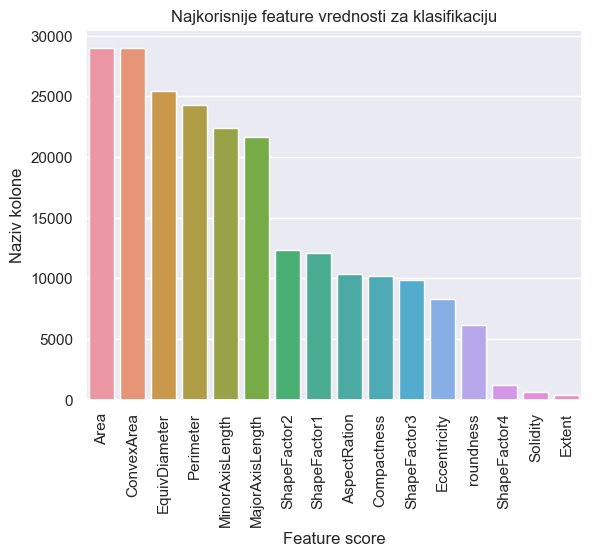

0               Area
3         ConvexArea
5      EquivDiameter
9          Perimeter
8    MinorAxisLength
Name: feature, dtype: object


In [38]:
#feature selection sa ANOVA f-testom, input numericki, output kategoricki
def feature_selection_anova(data, n_features):
    input_cols = data[data.columns.difference(['Class'])]
    output_col = data['Class']
    
    best_features = SelectKBest(score_func = f_classif, k=n_features)
    calc_features = best_features.fit(input_cols,output_col)

    features = pd.DataFrame({'feature' : input_cols.columns.values, 'score' : calc_features.scores_})
    features = features.sort_values(by=['score'] , ascending=False)
    sns.barplot(x=features['feature'], y=features['score'])
    plt.title('Najkorisnije feature vrednosti za klasifikaciju')
    plt.xlabel('Feature score')
    plt.xticks(rotation=90)
    plt.ylabel('Naziv kolone')
    plt.show()
    features_anova = features.head(n_features)
    return features_anova['feature']

print(feature_selection_anova(bean_data,5))

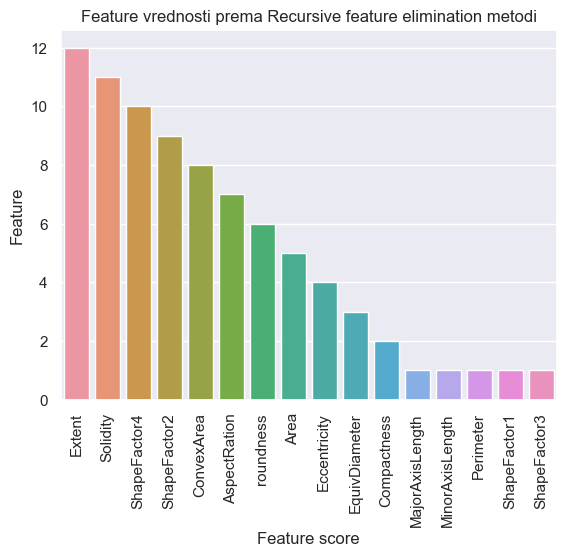

6           Extent
14        Solidity
13    ShapeFactor4
11    ShapeFactor2
3       ConvexArea
Name: Feature, dtype: object

In [39]:
def recursive_feature_elimination(ml_model, n_features):
    model = ml_model
    rfe = RFE(estimator = model, n_features_to_select = n_features)
    fit_model = rfe.fit(X_train, y_train)
    feature_score = fit_model.ranking_

    features = pd.DataFrame({'Feature' : input_cols.columns.values, 'Feature score' : feature_score})
    features = features.sort_values(by=['Feature score'] , ascending=False)
    sns.barplot(x=features['Feature'], y=features['Feature score'])
    plt.title('Feature vrednosti prema Recursive feature elimination metodi')
    plt.xlabel('Feature score')
    plt.xticks(rotation=90)
    plt.ylabel('Feature')
    plt.show()

    best_recursive_features = features.head(n_features)
    return best_recursive_features['Feature']
    
recursive_feature_elimination(RandomForestClassifier(), 5)

In [ ]:
#genetski algoritmi za feature selection 
estimator = RandomForestClassifier()
evolved_estimator = GAFeatureSelectionCV(
    estimator=estimator,
    cv=3,
    scoring="accuracy",
    population_size=30,
    generations=20,
    n_jobs=-1,
    verbose=True,
    keep_top_k=2,
    elitism=True,
)
evolved_estimator.fit(X_train, y_train)

gen_opt_features = evolved_estimator.best_features_
gen_df = pd.DataFrame({'feature': X_train.columns, 'is_used':gen_opt_features})

def highlight_cells(val):
    color = 'yellow' if val == True else ''
    return 'background-color: {}'.format(color)

selected_features = gen_df[gen_df['is_used'] == True]['feature']
gen_df.style.applymap(highlight_cells)

In [694]:
#funkcija za vracanje najboljih feature-a po genetskom algoritmu
def features_by_genetic_alg():
    return selected_features
print(features_by_genetic_alg())

0                Area
6              Extent
7     MajorAxisLength
9           Perimeter
11       ShapeFactor2
13       ShapeFactor4
14           Solidity
15          roundness
Name: feature, dtype: object


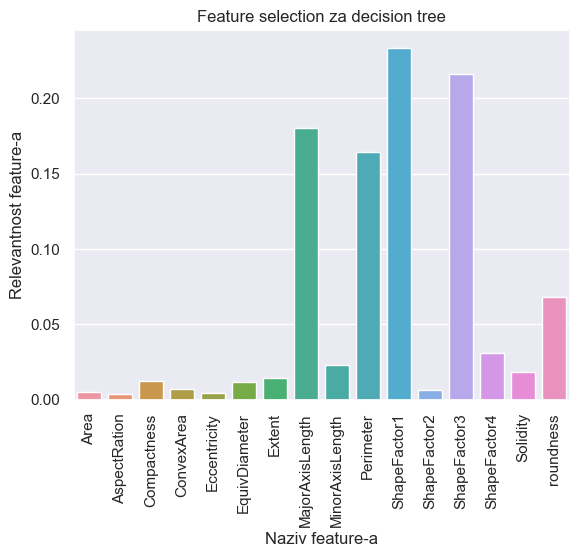

10       ShapeFactor1
12       ShapeFactor3
7     MajorAxisLength
9           Perimeter
15          roundness
Name: feature_names, dtype: object


In [40]:
#feature selection za decision tree 
def feature_selection_decision_tree(n_features):
    decision_tree.fit(input_cols, output_col)
    values = decision_tree.feature_importances_
    feature_names = input_cols.columns.values
    sns.barplot(x= feature_names, y=values)
    title = 'Feature selection za decision tree'
    plt.title(title)
    plt.xlabel('Naziv feature-a')
    plt.xticks(rotation=90)
    plt.ylabel('Relevantnost feature-a')
    plt.show()
    #pravimo dataframe da bismo zapamtili najrelevantnije feature
    tree_features = pd.DataFrame({'feature_names':feature_names, 'values':values})
    tree_features = tree_features.sort_values(by='values', ascending=False).head(n_features)
    tree_features = tree_features['feature_names']
    return tree_features
print(feature_selection_decision_tree(5))

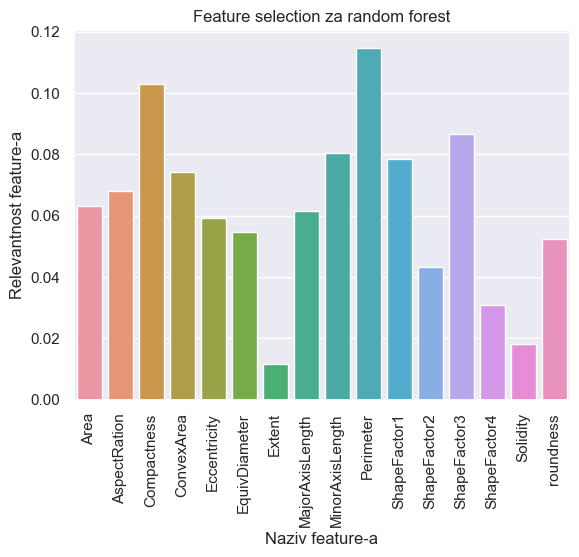

9           Perimeter
2         Compactness
12       ShapeFactor3
8     MinorAxisLength
10       ShapeFactor1
Name: feature_names, dtype: object


In [41]:
def feature_selection_random_forest(n_features):
    random_forest.fit(input_cols, output_col)
    values = random_forest.feature_importances_
    feature_names = input_cols.columns.values
    forest_features = pd.DataFrame({'feature_names':feature_names, 'values':values})
    forest_features = forest_features.sort_values(by='values', ascending=False).head(n_features)
    sns.barplot(x= feature_names, y=values)
    title = 'Feature selection za random forest'
    plt.title(title)
    plt.xlabel('Naziv feature-a')
    plt.xticks(rotation=90)
    plt.ylabel('Relevantnost feature-a')
    plt.show()
    #cuvanje najkorisnijih feature-a
    forest_features = forest_features['feature_names']
    return forest_features
print(feature_selection_random_forest(5))

In [49]:
#principal component analysis za feature reduction

#X_train i X_test setove cemo standardizovati zbog rada sa PCA
X_std = bean_data_b_no_outliers[bean_data_std.columns.difference(['Class'])]
y_std = bean_data_b_no_outliers['Class']
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.3)

pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

clr = RandomForestClassifier()
clr.fit(X_train, y_train)

y_pred_pca = clr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_pca)
print('Classification report sa svim feature-ima za PCA: \n' + (classification_report(y_test, y_pred_pca)))

#broj komponenti predstavljen vrednoscu nakon koje se uocava zaravnjenje krive
pca = PCA(n_components = 6)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
clr = RandomForestClassifier()
clr.fit(X_train, y_train)

y_pred_pca = clr.predict(X_test)
print('Classification report sa redukovanim feature-ima za PCA: \n' + (classification_report(y_test, y_pred_pca)))


Classification report sa svim feature-ima za PCA: 
              precision    recall  f1-score   support

    BARBUNYA       0.98      0.95      0.96      1057
      BOMBAY       1.00      1.00      1.00       846
        CALI       0.97      0.96      0.97      1033
    DERMASON       0.91      0.88      0.89      1017
       HOROZ       0.97      0.96      0.97      1011
       SEKER       0.98      0.96      0.97      1062
        SIRA       0.84      0.91      0.87      1048

    accuracy                           0.94      7074
   macro avg       0.95      0.95      0.95      7074
weighted avg       0.95      0.94      0.95      7074

Classification report sa redukovanim feature-ima za PCA: 
              precision    recall  f1-score   support

    BARBUNYA       0.97      0.95      0.96      1057
      BOMBAY       1.00      1.00      1.00       846
        CALI       0.97      0.96      0.97      1033
    DERMASON       0.90      0.92      0.91      1017
       HOROZ       0.97

In [50]:
#Linear Discriminant Analysis (LDA) za feature reduction
#maksimalan moguc broj komponenti je (broj klasa - 1)
steps = [('lda', LinearDiscriminantAnalysis(n_components=5)), ('model', RandomForestClassifier())]
model = Pipeline(steps=steps)
cv = KFold(n_splits = 10)
n_scores = cross_val_score(model, X_test, y_test, scoring = 'accuracy', cv=cv, n_jobs = -1)
print('Accuracy: %.3f ' % (n_scores.mean()))

Accuracy: 0.942 


In [145]:
#one hot encoding za target klasu, ali ne koristimo
encoder = OneHotEncoder() #jer nema ordera izmedju klasa
bean_data_new = pd.DataFrame(encoder.fit_transform(bean_data[['Class']]).toarray())
bean_data_enc = bean_data.join(bean_data_new)
#treba da izbacimo Class kolonu 
bean_data_enc.drop('Class', inplace=True, axis=1)
bean_data_enc.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor3,ShapeFactor4,Is_Outlier,0,1,2,3,4,5,6
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,...,0.834222,0.998724,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,...,0.909851,0.998430,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,...,0.825871,0.999066,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,...,0.861794,0.994199,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,...,0.941900,0.999166,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [71]:
#pored balansiranja i eliminacije outliera, odradjena je i normalizacija
minmax = MinMaxScaler()
cols_to_normalize = bean_data.columns.difference(['Class'])
bean_data_all = bean_data_b_no_outliers.copy()
bean_data_all[cols_to_normalize] = minmax.fit_transform(bean_data_all[cols_to_normalize])

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.54981

In [74]:
#obicni i preprocesirani podaci 
X_cols = bean_data[bean_data.columns.difference(['Class'])]
y_col = bean_data['Class']

X_cols_preprocessed = bean_data_all[bean_data.columns.difference(['Class'])]
y_col_preprocessed = bean_data_all['Class']

#treniranje sa neobradjenim i preprocesiranim skupom
X_train, X_test, y_train, y_test = train_test_split(X_cols, y_col, test_size=0.2)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_cols_preprocessed, y_col_preprocessed, test_size=0.2)

In [59]:
#modeli za klasifikaciju
models = [
            ('Decision Tree', decision_tree), 
            ('Gaussian Naive Bayes', naive_bayes), 
            ('K-Nearest Neighbors', knn), 
            ('Random Forest', random_forest),
            ('Gradient Boosting', grad_boosting)]
results = []
results_accuracy = []
results_precision = []
results_recall = []
results_f1 = []
names = []
k_fold = KFold(n_splits=10)
for name, model in models:
    cv_res = cross_validate(model, X_train, y_train, cv=k_fold, scoring=['accuracy', 'precision_macro', 'recall_macro','f1_macro'])
    results.append(cv_res)
    results_accuracy.append(cv_res['test_accuracy'].mean())
    results_precision.append(cv_res['test_precision_macro'].mean())
    results_recall.append(cv_res['test_recall_macro'].mean())
    results_f1.append(cv_res['test_f1_macro'].mean())
    names.append(name)

In [60]:
#tabelarni prikaz rezultata za razlicite modele bez preprocesiranja
diff_models_res = pd.DataFrame({'Model name': names,
                                'Accuracy': results_accuracy,
                                'Precision': results_precision, 
                                'Recall': results_recall,
                                'F1': results_f1})
print(diff_models_res)

             Model name  Accuracy  Precision    Recall        F1
0         Decision Tree  0.893093   0.907849  0.907977  0.907467
1  Gaussian Naive Bayes  0.764143   0.770642  0.766518  0.764716
2   K-Nearest Neighbors  0.723732   0.732852  0.720089  0.723722
3         Random Forest  0.922850   0.936029  0.932732  0.934056
4     Gradient Boosting  0.923493   0.937880  0.934351  0.935858


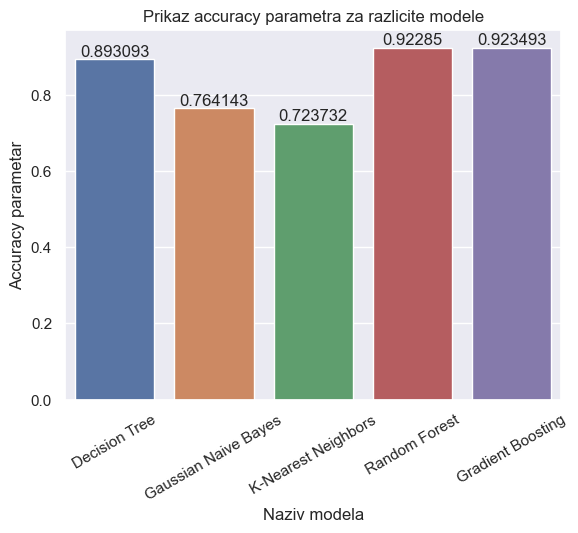

In [82]:
#vizuelizacija rezultata za accuracy
frame = pd.DataFrame({'model_name':names, 'accuracy':results_accuracy})
ax = sns.barplot(x = frame['model_name'], y=frame['accuracy'])
for i in ax.containers:
    ax.bar_label(i,)
title = 'Prikaz accuracy parametra za razlicite modele'
plt.title(title)
plt.xlabel('Naziv modela')
plt.xticks(rotation=30)
plt.ylabel('Accuracy parametar')
plt.show()

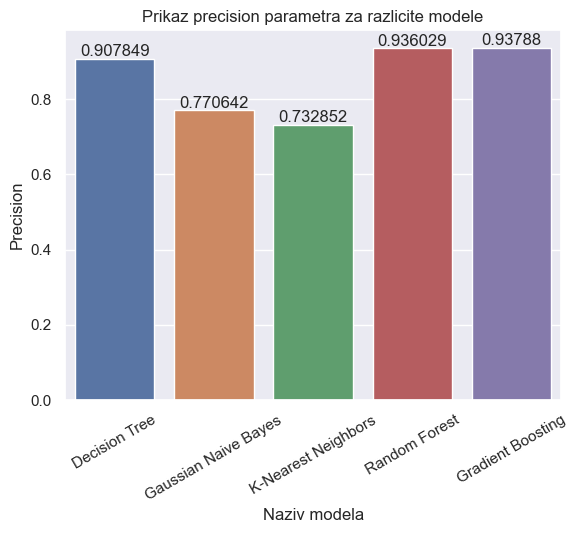

In [83]:
#vizuelizacija rezultata za precision parametar
frame = pd.DataFrame({'model_name':names, 'precision':results_precision})
ax = sns.barplot(x = frame['model_name'], y=frame['precision'])
for i in ax.containers:
    ax.bar_label(i,)
title = 'Prikaz precision parametra za razlicite modele'
plt.title(title)
plt.xlabel('Naziv modela')
plt.xticks(rotation=30)
plt.ylabel('Precision')
plt.show()

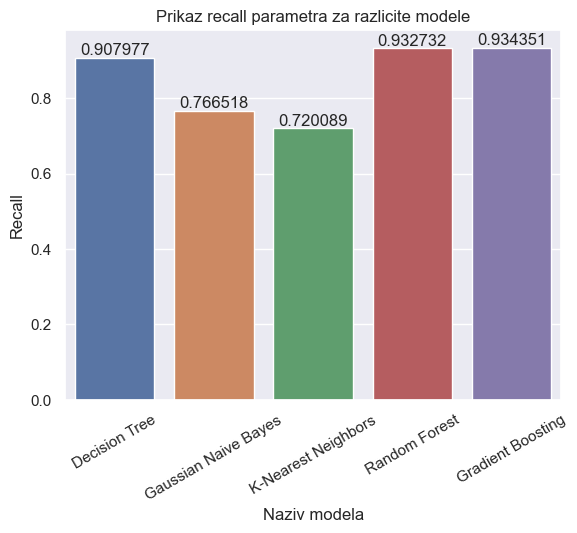

In [84]:
#vizuelizacija rezultata za recall
frame = pd.DataFrame({'model_name':names, 'recall':results_recall})
ax = sns.barplot(x = frame['model_name'], y=frame['recall'])
for i in ax.containers:
    ax.bar_label(i,)
title = 'Prikaz recall parametra za razlicite modele'
plt.title(title)
plt.xlabel('Naziv modela')
plt.xticks(rotation=30)
plt.ylabel('Recall')
plt.show()

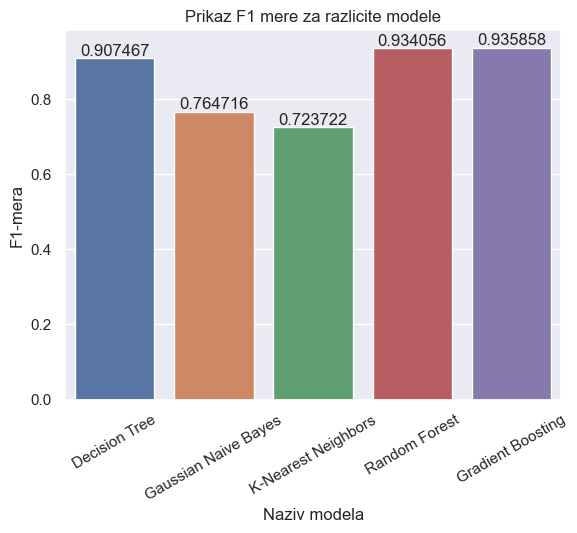

In [85]:
#vizuelizacija rezultata za f1 parametar
frame = pd.DataFrame({'model_name':names, 'f1':results_f1})
ax = sns.barplot(x = frame['model_name'], y=frame['f1'])
for i in ax.containers:
    ax.bar_label(i,)
title = 'Prikaz F1 mere za razlicite modele'
plt.title(title)
plt.xlabel('Naziv modela')
plt.xticks(rotation=30)
plt.ylabel('F1-mera')
plt.show()

In [ ]:
#deo sa podesavanjem hiperparametara

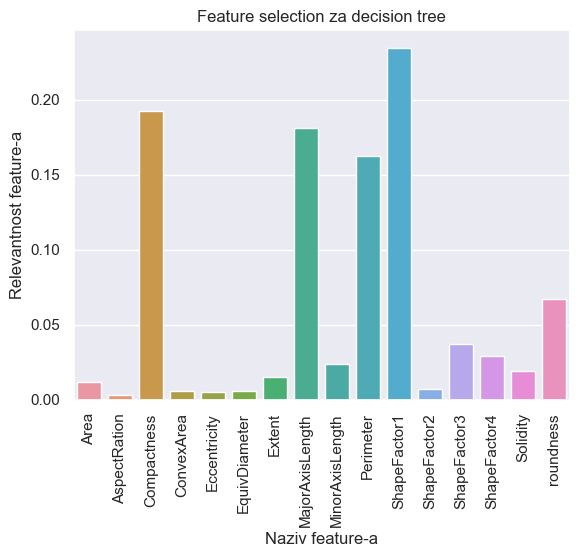

10       ShapeFactor1
2         Compactness
7     MajorAxisLength
9           Perimeter
15          roundness
Name: feature_names, dtype: object
Fitting 10 folds for each of 240 candidates, totalling 2400 fits
DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=9,
                       random_state=42)
Accuracy: 0.90
Classification report: 
              precision    recall  f1-score   support

    BARBUNYA       0.87      0.90      0.88       664
      BOMBAY       1.00      1.00      1.00       590
        CALI       0.92      0.86      0.89       681
    DERMASON       0.88      0.86      0.87       704
       HOROZ       0.90      0.94      0.92       684
       SEKER       0.92      0.93      0.92       666
        SIRA       0.83      0.83      0.83       727

    accuracy                           0.90      4716
   macro avg       0.90      0.90      0.90      4716
weighted avg       0.90      0.90      0.90      4716



In [75]:
#podesavanje hiperparametara za decision tree
parameters = {'max_leaf_nodes': list(range(2,10)), 
              'min_samples_split':[2,3,4],
              'max_depth': [2,3,5,9,10],
              'criterion': ['gini', 'entropy']}
#selekcija feature-a za decision tree
tree_features = feature_selection_decision_tree(5)
print(tree_features)
decisionTree = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(decisionTree, parameters,verbose=1,cv=10, n_jobs = -1)
best_model = grid_search_cv.fit(X_train_p[tree_features], y_train_p)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test_p[tree_features])
print('Accuracy: {:.2f}'.format(best_model.score(X_test_p[tree_features], y_test_p)))
print('Classification report: ')
print(classification_report(y_test_p, y_preds))

In [ ]:
#vizuelizacija decision tree-a
fig = plt.figure(figsize=(50,20))
feat_names = X_train.columns[feature_selector.get_support()]
tree.plot_tree(new_model, feature_names=feat_names ,class_names =output_col.values)
fig.savefig("dec_tree.png")

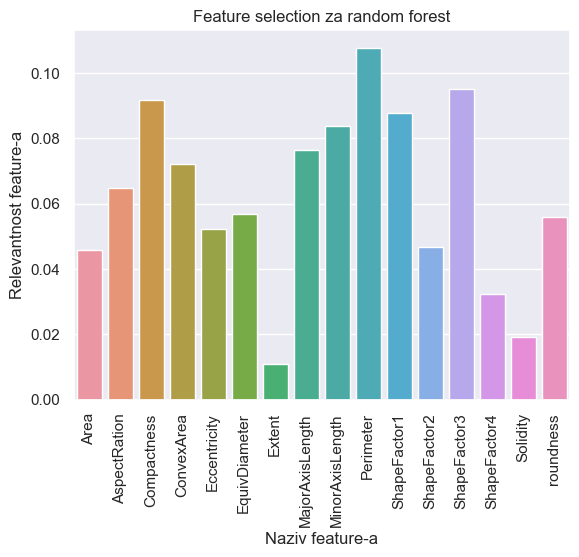

Fitting 5 folds for each of 90 candidates, totalling 450 fits
RandomForestClassifier(criterion='entropy', max_depth=9, max_features=5,
                       n_estimators=50, random_state=42)
Accuracy: 0.92
Classification report: 
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.89      0.91       664
      BOMBAY       1.00      1.00      1.00       590
        CALI       0.89      0.91      0.90       681
    DERMASON       0.88      0.90      0.89       704
       HOROZ       0.96      0.94      0.95       684
       SEKER       0.95      0.95      0.95       666
        SIRA       0.85      0.87      0.86       727

    accuracy                           0.92      4716
   macro avg       0.92      0.92      0.92      4716
weighted avg       0.92      0.92      0.92      4716



In [80]:
#podesavanje hiperparametara za random forest
parameters = {'n_estimators':[10,20,50], 
              'criterion': ['gini', 'entropy'],
              'max_features': list(range(3,8)),
              'max_depth': [2,4,9]
               }
random_forest = RandomForestClassifier(random_state=42)
forest_features = feature_selection_random_forest(5)
grid_search_cv = GridSearchCV(random_forest, parameters,verbose=1,cv=5, n_jobs = -1)
best_model = grid_search_cv.fit(X_train_p[forest_features], y_train_p)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test_p[forest_features])
print('Accuracy: {:.2f}'.format(best_model.score(X_test_p[forest_features], y_test_p)))
print('Classification report: ')
print(classification_report(y_test_p, y_preds))

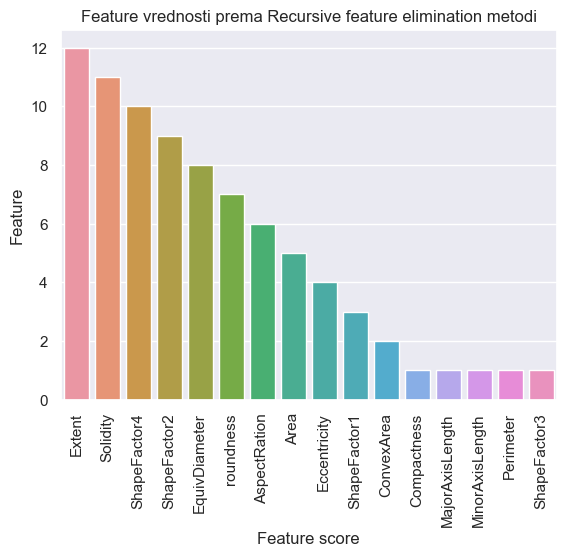

Fitting 10 folds for each of 486 candidates, totalling 4860 fits
KNeighborsClassifier(leaf_size=1, metric='manhattan', n_neighbors=7,
                     weights='distance')
Accuracy: 0.938295165394402
Classification report: 
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.95      0.95       664
      BOMBAY       1.00      1.00      1.00       590
        CALI       0.95      0.94      0.95       681
    DERMASON       0.92      0.87      0.90       704
       HOROZ       0.97      0.95      0.96       684
       SEKER       0.96      0.96      0.96       666
        SIRA       0.84      0.90      0.87       727

    accuracy                           0.94      4716
   macro avg       0.94      0.94      0.94      4716
weighted avg       0.94      0.94      0.94      4716



In [79]:
#podesavanje hiperparametara za k-nearest-neighbors
parameters = {'n_neighbors': list(range (1,10)), 
              'leaf_size' : list(range(1,10)),
              'metric': ['euclidean', 'manhattan', 'minkowski'], 
              'weights': ['uniform', 'distance']}
features_to_use = recursive_feature_elimination(RandomForestClassifier(), 5)
grid_search_cv = GridSearchCV(KNeighborsClassifier(), parameters,verbose=1,cv=10, n_jobs = -1)
best_model = grid_search_cv.fit(X_train_p[features_to_use], y_train_p)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test_p[features_to_use])
print('Accuracy: {}'.format(best_model.score(X_test_p[features_to_use], y_test_p)))
print('Classification report: ')
print(classification_report(y_test_p, y_preds))

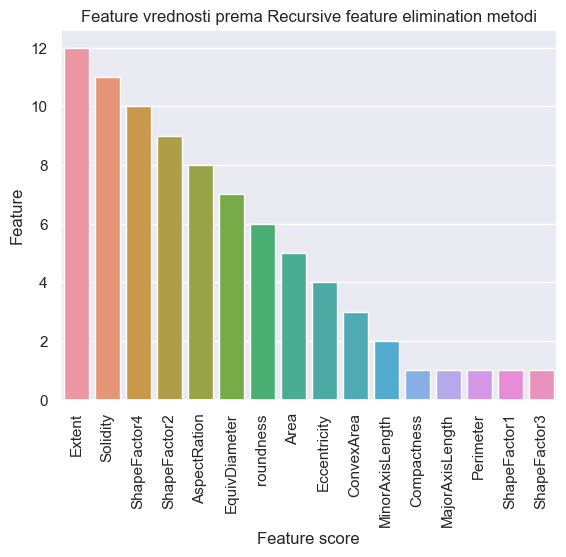

Fitting 10 folds for each of 60 candidates, totalling 600 fits
GradientBoostingClassifier(max_depth=5, n_estimators=50)
Accuracy: 0.9081894968784429
Classification report: 
              precision    recall  f1-score   support

    BARBUNYA       0.92      0.86      0.89       250
      BOMBAY       1.00      0.98      0.99       121
        CALI       0.89      0.92      0.91       344
    DERMASON       0.90      0.92      0.91       703
       HOROZ       0.92      0.93      0.92       382
       SEKER       0.96      0.94      0.95       384
        SIRA       0.85      0.86      0.85       539

    accuracy                           0.91      2723
   macro avg       0.92      0.92      0.92      2723
weighted avg       0.91      0.91      0.91      2723



In [81]:
#podesavanje hiperparametara za gradient boosting
parameters = {"n_estimators":[5,10,50],
              "max_depth":[1,3,5,9],
              "learning_rate":[0.01,0.1,1,10,100]}
features_to_use = recursive_feature_elimination(RandomForestClassifier(), 5)
grid_search_cv = GridSearchCV(GradientBoostingClassifier(), parameters,verbose=1,cv=10, n_jobs = -1)
best_model = grid_search_cv.fit(X_train[features_to_use], y_train)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test[features_to_use])
print('Accuracy: {}'.format(best_model.score(X_test[features_to_use], y_test)))
print('Classification report: ')
print(classification_report(y_test, y_preds))

In [87]:
#podesavanje hiperparametara za naive bayes
parameters = {'var_smoothing': np.logspace(0,-9,num=100)}
grid_search_cv = GridSearchCV(GaussianNB(), parameters,verbose=1,cv=10, n_jobs = -1)
best_model = grid_search_cv.fit(X_train_p, y_train_p)
print(grid_search_cv.best_estimator_)
y_preds = best_model.predict(X_test_p)
print('Accuracy: {}'.format(best_model.score(X_test_p, y_test_p)))
print('Classification report: ')
print(classification_report(y_test_p, y_preds))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.0008111308307896872)
Accuracy: 0.9149703138252756
Classification report: 
              precision    recall  f1-score   support

    BARBUNYA       0.90      0.87      0.88       664
      BOMBAY       1.00      1.00      1.00       590
        CALI       0.88      0.90      0.89       681
    DERMASON       0.91      0.88      0.90       704
       HOROZ       0.95      0.95      0.95       684
       SEKER       0.96      0.95      0.95       666
        SIRA       0.83      0.87      0.85       727

    accuracy                           0.91      4716
   macro avg       0.92      0.92      0.92      4716
weighted avg       0.92      0.91      0.92      4716



In [86]:
#primena neuronskih mreza na problem klasifikacije
mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter= 90,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.2,
)

pipeline = Pipeline(steps = [
    ('scaling', StandardScaler()),
    ('model', mlp)
])
trained_model = pipeline.fit(X_train, y_train)
y_preds = trained_model.predict(X_test)
plt.show()

cv = KFold(n_splits = 10)
n_scores = cross_val_score(trained_model, X_test, y_test, scoring = 'accuracy', cv=cv, n_jobs = -1)
print('Accuracy: %.3f ' % (n_scores.mean()))

Iteration 1, loss = 0.38664523
Iteration 2, loss = 0.21375919
Iteration 3, loss = 0.20434214
Iteration 4, loss = 0.19831347
Iteration 5, loss = 0.19646026
Iteration 6, loss = 0.19523829
Iteration 7, loss = 0.19195758
Iteration 8, loss = 0.19173003
Iteration 9, loss = 0.18846478
Iteration 10, loss = 0.18818132
Iteration 11, loss = 0.18644770
Iteration 12, loss = 0.18476433
Iteration 13, loss = 0.18555977
Iteration 14, loss = 0.18369271
Iteration 15, loss = 0.18435506
Iteration 16, loss = 0.18196422
Iteration 17, loss = 0.18117520
Iteration 18, loss = 0.18272589
Iteration 19, loss = 0.17955348
Iteration 20, loss = 0.17996674
Iteration 21, loss = 0.17979613
Iteration 22, loss = 0.17792446
Iteration 23, loss = 0.17889517
Iteration 24, loss = 0.17652648
Iteration 25, loss = 0.17572667
Iteration 26, loss = 0.17775297
Iteration 27, loss = 0.17471895
Iteration 28, loss = 0.17343872
Iteration 29, loss = 0.17317477
Iteration 30, loss = 0.17578634
Iteration 31, loss = 0.17307138
Iteration 32, los